<a href="https://colab.research.google.com/github/sxu0/TES_ozone/blob/main/TES_ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 24.4 MB/s 
     |████████████████████████████████| 6.3 MB 37.2 MB/s 
     |████████████████████████████████| 16.7 MB 56.8 MB/s 


In [21]:
from pathlib import Path
import datetime as dt

import numpy as np
import pandas as pd
import geopandas as gpd
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy
from dateutil.relativedelta import relativedelta

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## Load Data

In [2]:
drive_root = (
    Path.cwd() /
    "drive" /
    "Othercomputers" /
    "My Laptop" /
    "EngSci_Winter_2022" /
    "PHY408" /
    "Final Project"
)
data_paths = {}
data_paths["inc"] = drive_root / "mon_o3_inc_all.nc"
data_paths["spr"] = drive_root / "mon_o3_spr_all.nc"

Data Dimensions/Indices:
* `lev`: pressure level (27 total)
* `lat`: latitude (deg)
* `lon`: longitude (deg)
* `time`: month (1 through 156 (since 2005-01-01 01:00), spanning 13 years)

<img src="https://drive.google.com/uc?export=view&id=1rf3LNlQp94KBtZoFPVFnzYseM-1cZJCW" width=800\>


In [50]:
file = nc.Dataset(data_paths["spr"])
print(file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lon(320), lat(160), lev(27), time(156)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 lev(lev), float64 time(time), float32 o3(time, lev, lat, lon)
    groups: 


In [52]:
lon = np.array(file.variables["lon"])
lat = np.array(file.variables["lat"])
lev = np.array(file.variables["lev"])
time = np.array(file.variables["time"])
o3_data = np.array(file.variables["o3"])

In [53]:
print("\ntime:")
print(file.variables["time"])
print(time)

print("\nlat:")
print(file.variables["lat"])
# print(lat)

print("\nlon:")
print(file.variables["lon"])
print(lon[0], lon[-1])

print("\nlev:")
print(file.variables["lev"])
print(lev)

print("\nO3 data:")
print(file.variables["o3"])


time:
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: months since 2005-01-01 01:00
unlimited dimensions: 
current shape = (156,)
filling on, default _FillValue of 9.969209968386869e+36 used
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151.

In [54]:
## datetime objects, incrementing by month from 2005-01-01 01:00
time_dt = np.full(len(time), dt.datetime(year=2005, month=1, day=1, hour=1))
for i in range(len(time)):
    time_dt[i] += relativedelta(months=time[i])

## Column O$_3$

Summed over all 27 layers of atmosphere

In [55]:
column_o3 = np.sum(o3_data, axis=1)
print(column_o3.shape)
print(column_o3.dtype)

(156, 160, 320)
float32


Text(0.5, 1.0, 'Ozone spread in 2007-01')

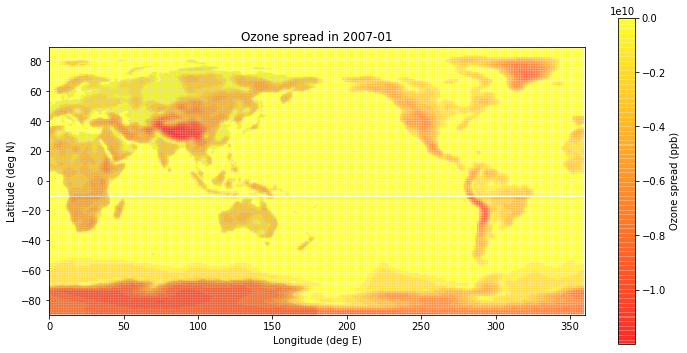

In [68]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

## broadcasted lat & lon
lon_bc = np.tile(lon, lat.size)
lat_bc = np.repeat(lat, lon.size)

time_of_interest = 24  # month index
col_o3_of_interest = column_o3[time_of_interest, :, :].flatten()

plt.scatter(lon_bc, lat_bc, s=0.9, c=col_o3_of_interest, alpha=0.6, cmap='autumn')
plt.colorbar(label="Ozone spread (ppb)")
plt.xlim((0, 360))
plt.ylim((-90, 90))
plt.xlabel("Longitude (deg E)")
plt.ylabel("Latitude (deg N)")
plt.title("Ozone spread in " + str(time_dt[time_of_interest])[:7])

## stretch goal: animate this

# New Section

Sources:

https://tes.jpl.nasa.gov/tes/chemical-reanalysis (courtesy of Prof Jones)

https://acp.copernicus.org/articles/15/8315/2015/acp-15-8315-2015.pdf